In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import FunctionLib
#%matplotlib widget
basePath ='./sims.TNG/TNG50-1/output'
from tqdm import tqdm
import gc
import os

lbsg_index_list=[117251,117254,300903,307486,324123,329508,342446,382215,383975,388544,400973,419618,434356,448830,457431,460722,462710,490814,507292,514272,529855]

In [2]:
for index in lbsg_index_list:
    
    sublink_tree=il.sublink.loadTree(basePath, 99, index, fields=['SubfindID','SnapNum','Mass'], onlyMPB=False)
    condition=(sublink_tree['Mass']>1)&(sublink_tree['SnapNum']>=67)
    tree_index=np.where(condition)[0] 
    
    cold_gas_mass_list=[]
    gas_mass_list=[]
    cold_gas_ratio=[]
    for Snaps in tqdm(range(99,66,-1)):
        redshift_condition=(sublink_tree['SnapNum']==Snaps)&(sublink_tree['Mass']>0.1)
        redshift_index=np.where(redshift_condition)[0]
        cold_gas_mass_sum=0
        gas_mass_sum=0
        
        if isinstance(redshift_index, int):
            redshift_index = np.array([redshift_index])
            
        for i in redshift_index:
            cold_gas_mass,gas_mass=FunctionLib.Cold_Gas_Mass(Snaps,sublink_tree['SubfindID'][i])
            cold_gas_mass_sum+=cold_gas_mass
            gas_mass_sum+=gas_mass
        cold_gas_mass_list.append(cold_gas_mass_sum)
        gas_mass_list.append(gas_mass_sum)
        ratio=cold_gas_mass_sum/gas_mass_sum
        cold_gas_ratio.append(ratio)
    cold_gas_mass_array=np.log(np.array(cold_gas_mass_list))
    gas_mass_array=np.log(np.array(gas_mass_list))
    cold_gas_ratio=np.array(cold_gas_ratio)
    if not os.path.exists('./cgm/' + str(index)+'/'+'cold_gas'):
        os.makedirs('./cgm/' +str(index)+'/'+'cold_gas')
    plt.plot(range(99,66,-1),cold_gas_mass_array)
    plt.savefig('./cgm/' +str(index)+'/'+'cold_gas'+'/coldgas.png')
    plt.close('all')
    
    plt.plot(range(99,66,-1),gas_mass_array)
    plt.savefig('./cgm/' +str(index)+'/'+'cold_gas'+'/gas.png')    
    plt.close('all')
    
    plt.plot(range(99,66,-1),cold_gas_ratio)
    plt.savefig('./cgm/' +str(index)+'/'+'cold_gas'+'/ratio.png')    
    plt.close('all')    
    
    plt.plot(range(99,66,-1),cold_gas_mass_array)
    plt.plot(range(99,66,-1),gas_mass_array)
    plt.savefig('./cgm/' +str(index)+'/'+'cold_gas'+'/gascom.png')    
    plt.close('all')

  9%|▉         | 3/33 [00:07<01:17,  2.60s/it]


KeyboardInterrupt: 

In [2]:
gas=il.snapshot.loadSubhalo(basePath,99,329508,0,fields=['Masses'])

In [4]:
gas.sum()

52.368103

In [5]:
subhalos=il.groupcat.loadSubhalos(basePath,99,fields=['SubhaloMass'])

In [16]:
stars=il.snapshot.loadSubhalo(basePath,99,329508,5,fields=['BH_Mass'])

In [7]:
subhalos[329508]

775.56519

In [19]:
dm.shape

(22461945, 3)

In [13]:
def drawstars(i,sp,savepath,basePath):
    gas_data=il.snapshot.loadSubhalo(basePath, sp, i, 'stars', fields=['Coordinates','Masses'])
    
    GasCoordinates = gas_data['Coordinates']
    Masses = gas_data['Masses']

    GasCoorMin = GasCoordinates.min(axis=0)
    GasCoorMax = GasCoordinates.max(axis=0)
    CircleCenter = (GasCoorMin + GasCoorMax) / 2
    plt.figure(figsize=(12, 12), dpi=200)

    plt.style.use("dark_background")
    bars=(GasCoorMax-GasCoorMin)
    h, _, _, image = plt.hist2d(GasCoordinates[:, 1],
                            GasCoordinates[:, 2],
                            weights=Masses,
                            cmin=1E-5,
                            norm=mpl.colors.LogNorm(),
                            bins=(bars[1],bars[2]))
    plt.xlim([GasCoorMin[1],GasCoorMax[1]])
    plt.ylim([GasCoorMin[2],GasCoorMax[2]])
    plt.xlabel('y [ckpc/h]')
    plt.ylabel('z [ckpc/h]')
    #draw_circle = plt.Circle(( CircleCenter[1],  CircleCenter[2]), 150, fill=False)
    #plt.gcf().gca().add_artist(draw_circle)
    plt.colorbar(image)
    plt.gca().set_aspect(1)
#    plt.savefig(savepath+'/{}.png'.format(i))

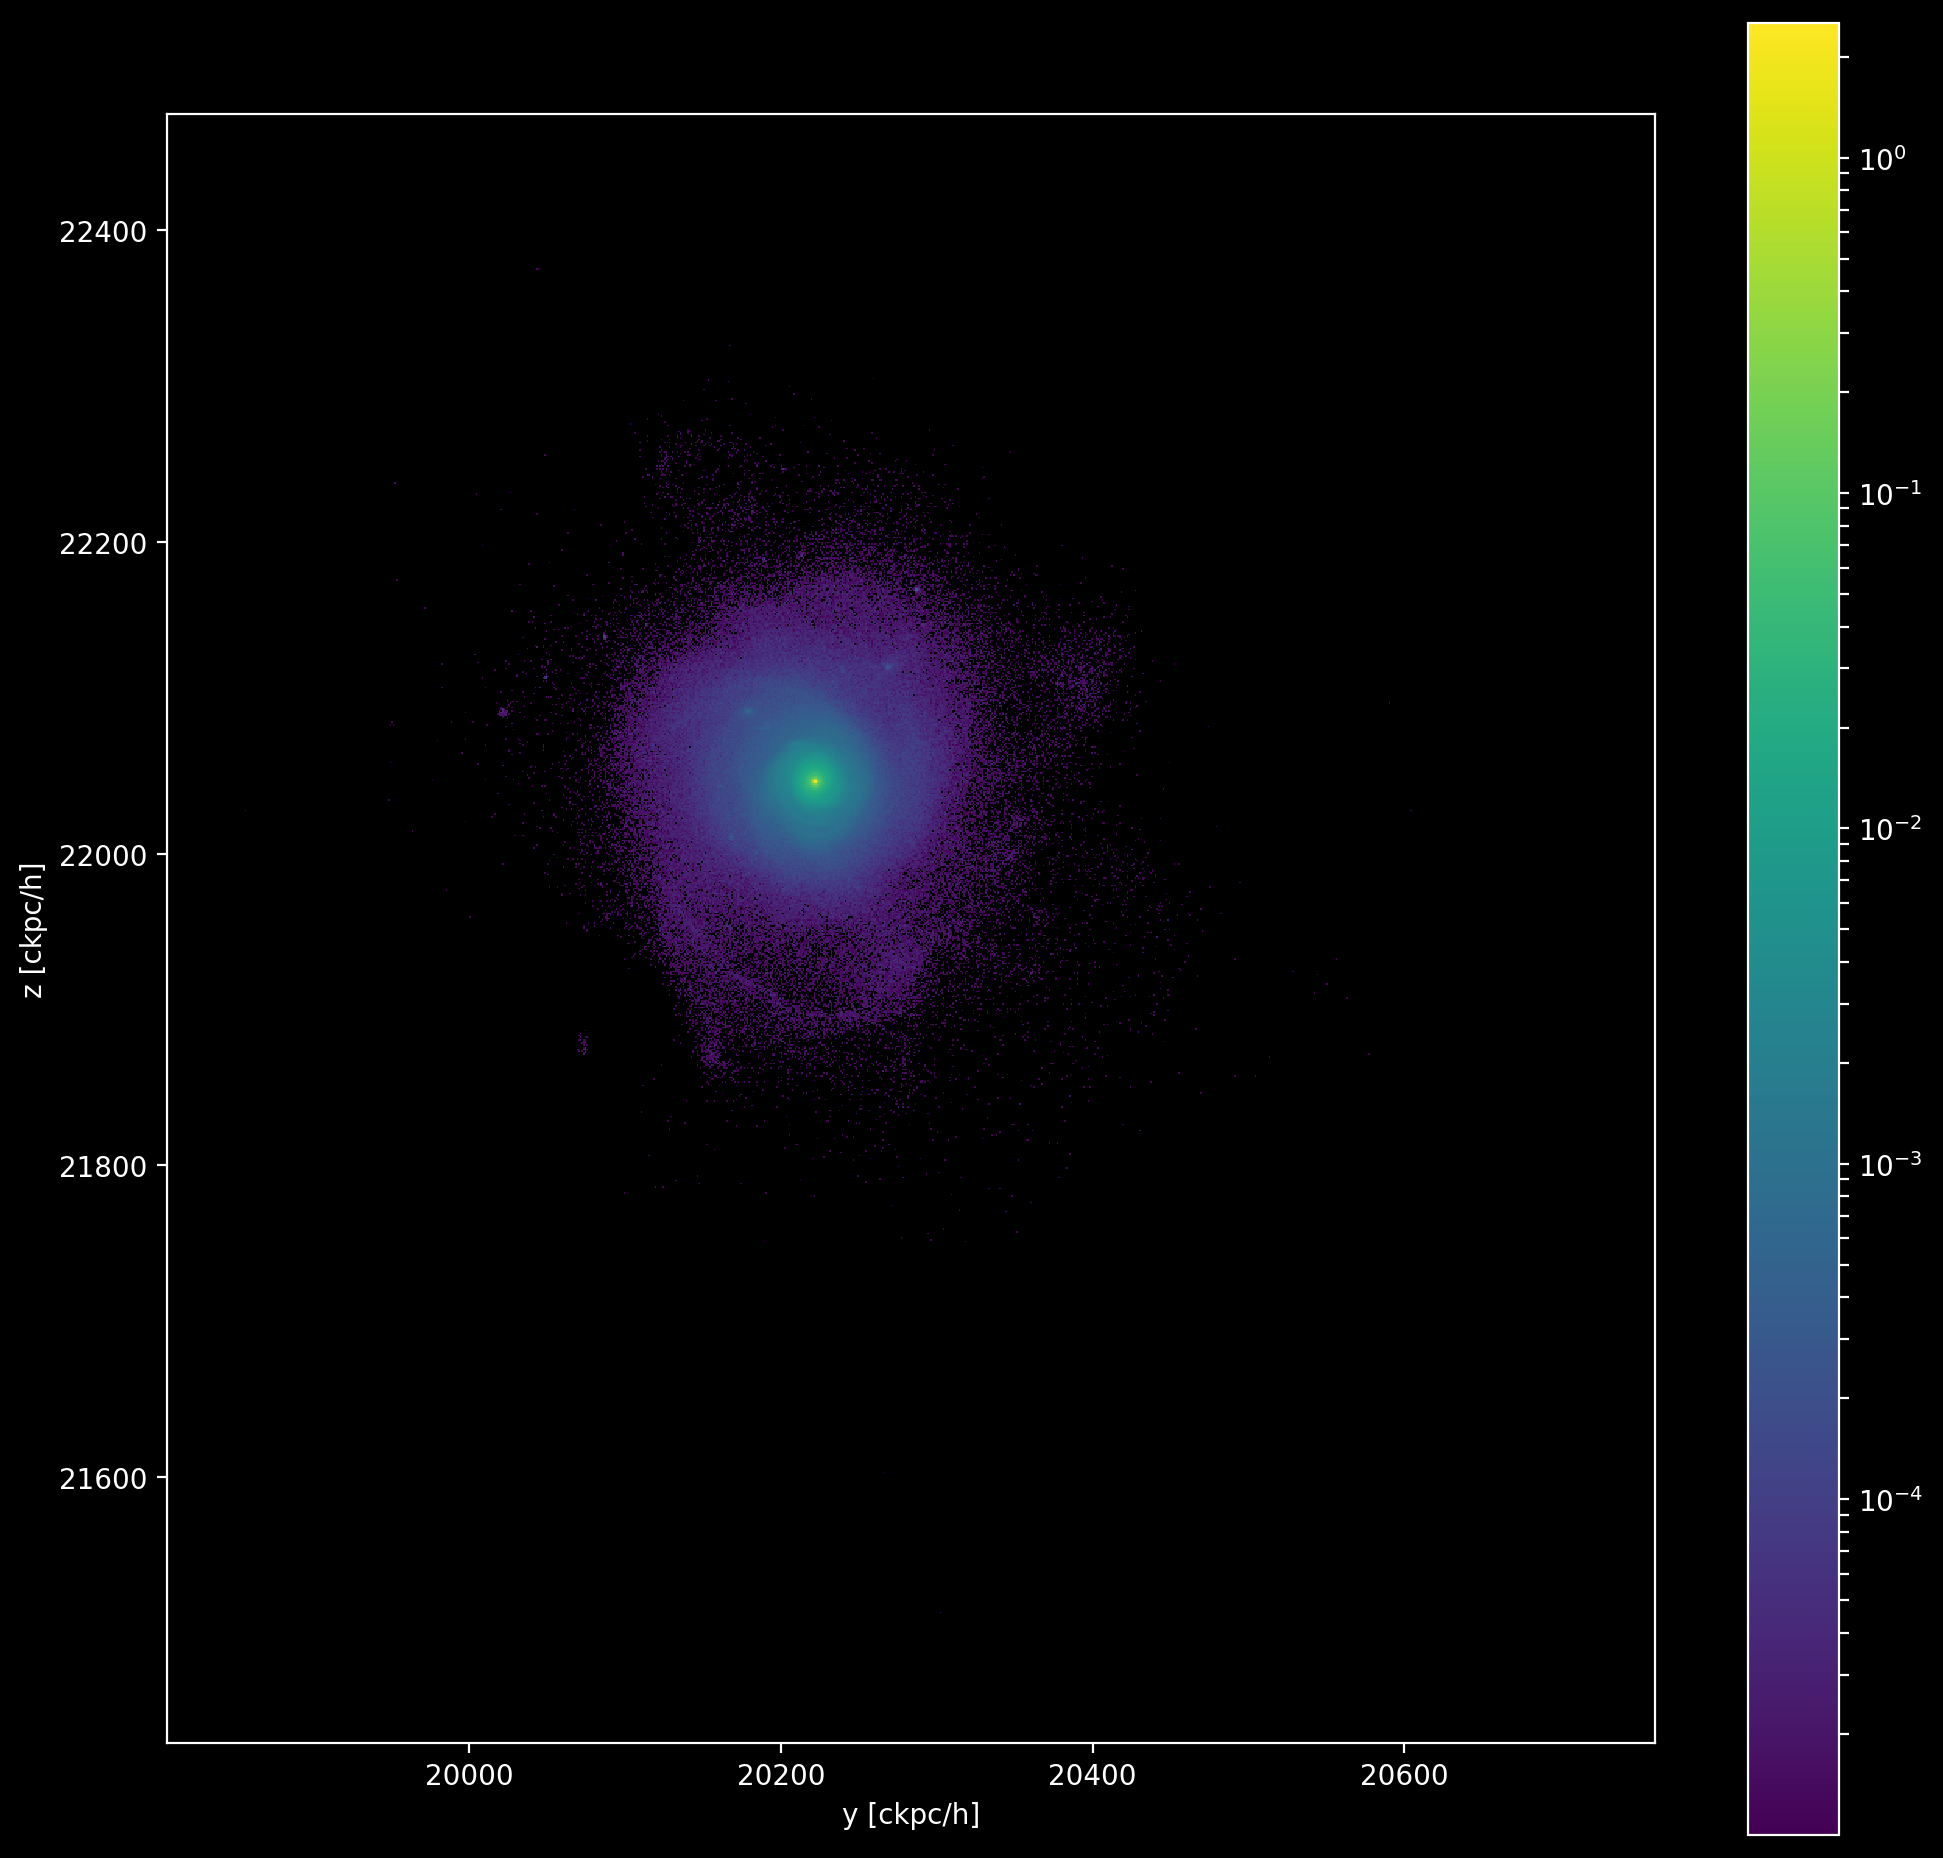

In [14]:
drawstars(329508,99,'none',basePath)

In [5]:
gas_data=il.snapshot.loadSubhalo(basePath, 99, 329508, 'gas', fields=['Coordinates','Masses','NeutralHydrogenAbundance'])
    
GasCoordinates = gas_data['Coordinates']
Masses = gas_data['Masses']
Abundance=gas_data['NeutralHydrogenAbundance']

HI_mass=Abundance*Masses
HI_mass.sum()

6.9846253